# Data Description

We are analyzing crimes data for New York City. Every record identifies complaint of a criminal activity. 

It has 23 features, the description of which are as follows:

CMPLNT_NUM: Randomly generated persistent ID for each complaint

CMPLNT_FR_DT: Exact date of occurrence for the reported event 

CMPLNT_FR_TM: Exact time of occurrence for the reported event 

CMPLNT_TO_DT: Ending date of occurrence for the reported event, if exact time of occurrence is unknown

CMPLNT_TO_TM: Ending time of occurrence for the reported event, if exact time of occurrence is unknown

RPT_DT: Date event was reported to police

KY_CD: Three digit offense classification code

OFNS_DESC: Description of offense corresponding with key code

PD_CD: Three digit internal classification code (more granular than Key Code)

PD_DESC: Description of internal classification corresponding with PD code

CRM_ATPT_CPTD_CD: Indicator of whether crime was successfully completed or attempted, but failed or was interrupted 

LAW_CAT_CD: Level of offense: felony, misdemeanor, violation

JURIS_DESC: Jurisdiction responsible for incident. Either internal, like Police, Transit, and Housing

BORO_NM: The name of the borough in which the incident occurred

ADDR_PCT_CD: The precinct in which the incident occurred

LOC_OF_OCCUR_DESC: Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of, etc.

PREM_TYP_DESC: Specific description of premises; grocery store, residence, street, etc.

PARKS_NM:Name of NYC park, playground or greenspace of occurrence, if applicable

HADEVELOPT: Name of NYCHA housing development of occurrence, if applicable

X_COORD_CD: X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet 

Y_COORD_CD: Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet 

Latitude: Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

Longitude: Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

# Work Flow

1. Save data in the MongoDB database. 
2. Do the necessary preprocessing like checing nan and duplicates, etc. 
3. Encode categorical columns to change true to 1 and false to 0.
4. Proceed to create new features like year, month, day of week, etc.
5. Do data analysis and visualization.
6. Save the new dataset created in the database.

# Saving data in the MongoDB Database

In [1]:
#importing libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymongo
from pymongo import MongoClient

#turning off the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#creating connection with MongoDB Database
client = pymongo.MongoClient("mongodb://%s:%s@127.0.0.1" % ("dap","dap"))

In [3]:
#reading CSV file as a dataframe
df = pd.read_csv("NewYorkCrimes.csv")

In [4]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [5]:
df.tail()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
1048570,317154175,11/1/2013,20:30:00,11/1/2013,21:00:00,11/1/2013,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,40.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1006185.0,233271.0,40.806932,-73.920767,"(40.806931888, -73.920766811)"
1048571,833410354,11/1/2013,20:28:00,11/1/2013,20:31:00,11/1/2013,344,ASSAULT 3 & RELATED OFFENSES,113.0,"MENACING,UNCLASSIFIED",...,75.0,FRONT OF,GROCERY/BODEGA,NaN,NaN,1013319.0,180075.0,40.660901,-73.895227,"(40.660901484, -73.895226891)"
1048572,961949188,11/1/2013,20:25:00,NaN,NaN,11/1/2013,121,CRIMINAL MISCHIEF & RELATED OF,269.0,"MISCHIEF,CRIMINAL, UNCL 2ND",...,1.0,INSIDE,FAST FOOD,NaN,NaN,982953.0,203013.0,40.723909,-74.004681,"(40.723908621, -74.004680695)"
1048573,157608118,11/1/2013,20:25:00,11/1/2013,20:45:00,11/1/2013,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,52.0,FRONT OF,STREET,NaN,NaN,1019388.0,259017.0,40.877554,-73.872939,"(40.877554428, -73.872939471)"
1048574,176151924,11/1/2013,20:25:00,11/1/2013,20:30:00,11/1/2013,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",...,32.0,NaN,TRANSIT - NYC SUBWAY,NaN,NaN,1000622.0,235883.0,40.814113,-73.940855,"(40.814113161, -73.940855365)"


In [6]:
df.shape

(1048575, 24)

In [7]:
#saving dataframe as JSON file becuase MongoDB stores data in dictionary format
data = df.to_dict(orient="records")

In [8]:
data

[{'CMPLNT_NUM': 101109527,
  'CMPLNT_FR_DT': '12/31/2015',
  'CMPLNT_FR_TM': '23:45:00',
  'CMPLNT_TO_DT': nan,
  'CMPLNT_TO_TM': nan,
  'RPT_DT': '12/31/2015',
  'KY_CD': 113,
  'OFNS_DESC': 'FORGERY',
  'PD_CD': 729.0,
  'PD_DESC': 'FORGERY,ETC.,UNCLASSIFIED-FELO',
  'CRM_ATPT_CPTD_CD': 'COMPLETED',
  'LAW_CAT_CD': 'FELONY',
  'JURIS_DESC': 'N.Y. POLICE DEPT',
  'BORO_NM': 'BRONX',
  'ADDR_PCT_CD': 44.0,
  'LOC_OF_OCCUR_DESC': 'INSIDE',
  'PREM_TYP_DESC': 'BAR/NIGHT CLUB',
  'PARKS_NM': nan,
  'HADEVELOPT': nan,
  'X_COORD_CD': 1007314.0,
  'Y_COORD_CD': 241257.0,
  'Latitude': 40.82884833,
  'Longitude': -73.91666114,
  'Lat_Lon': '(40.828848333, -73.916661142)'},
 {'CMPLNT_NUM': 153401121,
  'CMPLNT_FR_DT': '12/31/2015',
  'CMPLNT_FR_TM': '23:36:00',
  'CMPLNT_TO_DT': nan,
  'CMPLNT_TO_TM': nan,
  'RPT_DT': '12/31/2015',
  'KY_CD': 101,
  'OFNS_DESC': 'MURDER & NON-NEGL. MANSLAUGHTER',
  'PD_CD': nan,
  'PD_DESC': nan,
  'CRM_ATPT_CPTD_CD': 'COMPLETED',
  'LAW_CAT_CD': 'FELONY',
  

In [9]:
#creating database variable to save the records to MongoDB
db = client["MachineLearning"] #MachineLearning is the name of the database

In [10]:
print(db)

Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'MachineLearning')


In [11]:
db.NewYorkCrime.insert_many(data)

# Data Preprocessing

In [1]:
#getting data from MongoDB
client = pymongo.MongoClient("mongodb://%s:%s@127.0.0.1" % ("dap","dap"))
mydb = client["MachineLearning"]
mycol = mydb["NewYorkCrime"]
df_mongo = pd.DataFrame(list(mycol.find()))
df_mongo.drop("_id",inplace=True,axis=1)
df_mongo.head()

NameError: name 'pymongo' is not defined

In [89]:
#checking shape of dataset
df_mongo.shape

(1048575, 24)

In [90]:
#checking missing values for each column 
df_mongo.isnull().sum().sort_values(ascending=False)

PARKS_NM             1040976
HADEVELOPT            996803
LOC_OF_OCCUR_DESC     217752
CMPLNT_TO_DT          205959
CMPLNT_TO_TM          205573
Lat_Lon                32417
X_COORD_CD             32417
Longitude              32417
Latitude               32417
Y_COORD_CD             32417
PREM_TYP_DESC           4689
OFNS_DESC               2880
PD_DESC                  733
PD_CD                    733
CMPLNT_FR_DT              65
CRM_ATPT_CPTD_CD           1
ADDR_PCT_CD                1
CMPLNT_NUM                 0
BORO_NM                    0
LAW_CAT_CD                 0
KY_CD                      0
RPT_DT                     0
CMPLNT_FR_TM               0
JURIS_DESC                 0
dtype: int64

PARKS_NM, which is the Name of NYC park, playground or greenspace of occurrence, and HADEVELOPT, which is the name of NYCHA housing development of occurrence are both if applicable columns. So, we can drop them without much concern.

We are also not concerned with the LOC_OF_OCCUR_DESC (exact location),CMPLNT_TO_DT (Ending date), CMPLNT_TO_TM (Ending Time), Lat_Lon, X_COORD_CD, Y_COORD_CD. These columns can also be dropped.

In [91]:
#dropping unneccesary columns
df_mongo.drop(['PARKS_NM', 'HADEVELOPT', 'LOC_OF_OCCUR_DESC', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'Lat_Lon', 'X_COORD_CD', 'Y_COORD_CD'], axis=1, inplace=True)

In [92]:
df_mongo

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC,Latitude,Longitude
0,101109527,12/31/2015,23:45:00,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44.0,BAR/NIGHT CLUB,40.828848,-73.916661
1,153401121,12/31/2015,23:36:00,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,NaN,40.697338,-73.784557
2,569369778,12/31/2015,23:30:00,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,OTHER,40.802607,-73.945052
3,968417082,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,RESIDENCE-HOUSE,40.654549,-73.726339
4,641637920,12/31/2015,23:25:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,OTHER,40.738002,-73.987891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,317154175,11/1/2013,20:30:00,11/1/2013,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,40.0,RESIDENCE - APT. HOUSE,40.806932,-73.920767
1048571,833410354,11/1/2013,20:28:00,11/1/2013,344,ASSAULT 3 & RELATED OFFENSES,113.0,"MENACING,UNCLASSIFIED",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,75.0,GROCERY/BODEGA,40.660901,-73.895227
1048572,961949188,11/1/2013,20:25:00,11/1/2013,121,CRIMINAL MISCHIEF & RELATED OF,269.0,"MISCHIEF,CRIMINAL, UNCL 2ND",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,1.0,FAST FOOD,40.723909,-74.004681
1048573,157608118,11/1/2013,20:25:00,11/1/2013,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,52.0,STREET,40.877554,-73.872939


The PD_CD, PD_DESC, CRM_ATPT_CPTD_CD, and ADDR_PCT_CD columns can also be dropped.

In [93]:
#dropping unneccesary columns
df_mongo.drop(['PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'ADDR_PCT_CD', 'CMPLNT_NUM', 'RPT_DT'], axis=1, inplace=True)
df_mongo

,CMPLNT_FR_DT,CMPLNT_FR_TM,KY_CD,OFNS_DESC,LAW_CAT_CD,JURIS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude
0,12/31/2015,23:45:00,113,FORGERY,FELONY,N.Y. POLICE DEPT,BRONX,BAR/NIGHT CLUB,40.828848,-73.916661
1,12/31/2015,23:36:00,101,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,N.Y. POLICE DEPT,QUEENS,NaN,40.697338,-73.784557
2,12/31/2015,23:30:00,117,DANGEROUS DRUGS,FELONY,N.Y. POLICE DEPT,MANHATTAN,OTHER,40.802607,-73.945052
3,12/31/2015,23:30:00,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,RESIDENCE-HOUSE,40.654549,-73.726339
4,12/31/2015,23:25:00,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,OTHER,40.738002,-73.987891
...,...,...,...,...,...,...,...,...,...,...
1048570,11/1/2013,20:30:00,341,PETIT LARCENY,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,RESIDENCE - APT. HOUSE,40.806932,-73.920767
1048571,11/1/2013,20:28:00,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,GROCERY/BODEGA,40.660901,-73.895227
1048572,11/1/2013,20:25:00,121,CRIMINAL MISCHIEF & RELATED OF,FELONY,N.Y. POLICE DEPT,MANHATTAN,FAST FOOD,40.723909,-74.004681
1048573,11/1/2013,20:25:00,235,DANGEROUS DRUGS,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,STREET,40.877554,-73.872939


In [94]:
#checking the rows with missing values
df_mongo[df_mongo.isnull().any(axis=1)].head(10)

,CMPLNT_FR_DT,CMPLNT_FR_TM,KY_CD,OFNS_DESC,LAW_CAT_CD,JURIS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude
1,12/31/2015,23:36:00,101,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,N.Y. POLICE DEPT,QUEENS,NaN,40.697338,-73.784557
21,4/6/2015,12:00:00,104,RAPE,FELONY,N.Y. POLICE DEPT,QUEENS,OTHER,NaN,NaN
41,12/31/2015,22:20:00,233,SEX CRIMES,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,BAR/NIGHT CLUB,NaN,NaN
126,6/26/2013,15:00:00,116,SEX CRIMES,FELONY,N.Y. POLICE DEPT,BROOKLYN,RESIDENCE-HOUSE,NaN,NaN
252,12/1/2009,10:00:00,104,RAPE,FELONY,N.Y. POLICE DEPT,BROOKLYN,RESIDENCE - APT. HOUSE,NaN,NaN
309,12/31/2015,14:31:00,233,SEX CRIMES,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,FAST FOOD,NaN,NaN
362,12/31/2015,13:00:00,233,SEX CRIMES,MISDEMEANOR,N.Y. POLICE DEPT,STATEN ISLAND,RESIDENCE-HOUSE,NaN,NaN
471,12/31/2015,9:05:00,351,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,NaN,40.713313,-73.766559
479,12/31/2015,9:00:00,233,SEX CRIMES,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,RESIDENCE-HOUSE,NaN,NaN
507,12/31/2015,7:45:00,233,SEX CRIMES,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,TUNNEL,NaN,NaN


We will drop the rows that have missing values. Since we have a fairly large dataset, it would not impact our analysis.

In [95]:
#dropping rows with missing values and creating df_new without missing values
newdf = df_mongo.dropna()

In [96]:
#checking how many observations we have after dropping missing value rows
newdf.shape

(1008815, 10)

In [97]:
#rechecking missing values for each column 
newdf.isnull().sum().sort_values(ascending=False)

CMPLNT_FR_DT     0
CMPLNT_FR_TM     0
KY_CD            0
OFNS_DESC        0
LAW_CAT_CD       0
JURIS_DESC       0
BORO_NM          0
PREM_TYP_DESC    0
Latitude         0
Longitude        0
dtype: int64

We have successfully cleaned rows with NaN values.

In [98]:
#descriptive analysis of the data
newdf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CMPLNT_FR_DT,1008815,2236,1/1/2014,2060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CMPLNT_FR_TM,1008815,1440,12:00:00,26678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KY_CD,1008815.0,NaN,NaN,NaN,296.92393,151.251591,102.0,117.0,341.0,351.0,881.0
OFNS_DESC,1008815,66,PETIT LARCENY,175438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LAW_CAT_CD,1008815,3,MISDEMEANOR,560111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JURIS_DESC,1008815,20,N.Y. POLICE DEPT,898783,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BORO_NM,1008815,5,BROOKLYN,307100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PREM_TYP_DESC,1008815,70,STREET,311515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,1008815.0,NaN,NaN,NaN,40.734135,0.083587,40.498768,40.67136,40.730086,40.811219,40.912723
Longitude,1008815.0,NaN,NaN,NaN,-73.925096,0.077437,-74.255076,-73.971877,-73.926412,-73.883326,-73.700577


In [99]:
#checking if columns have the right data types or not
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008815 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   CMPLNT_FR_DT   1008815 non-null  object 
 1   CMPLNT_FR_TM   1008815 non-null  object 
 2   KY_CD          1008815 non-null  int64  
 3   OFNS_DESC      1008815 non-null  object 
 4   LAW_CAT_CD     1008815 non-null  object 
 5   JURIS_DESC     1008815 non-null  object 
 6   BORO_NM        1008815 non-null  object 
 7   PREM_TYP_DESC  1008815 non-null  object 
 8   Latitude       1008815 non-null  float64
 9   Longitude      1008815 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 84.7+ MB


We can change the data type of CMPLNT_FR_DT, CMPLNT_FR_TM, and RPT_DT columns to 'Datetime'. Rest columns have appropriate data types.

In [100]:
#checking for duplicate rows if any
newdf.duplicated().sum()

19074

In [101]:
#dropping duplicate rows
newdf.drop_duplicates(inplace=True)

In [102]:
#rechecking the shape
newdf.shape

(989741, 10)

# Data Transformation

In [103]:
#Combining date and time columns into a single string
newdf['DateOn'] = newdf['CMPLNT_FR_DT']+" "+ newdf['CMPLNT_FR_TM']

#dropping date column
newdf.drop(['CMPLNT_FR_DT'], axis=1, inplace=True)

#dropping time column
newdf.drop(['CMPLNT_FR_TM'], axis=1, inplace=True)

newdf

,KY_CD,OFNS_DESC,LAW_CAT_CD,JURIS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,DateOn
0,113,FORGERY,FELONY,N.Y. POLICE DEPT,BRONX,BAR/NIGHT CLUB,40.828848,-73.916661,12/31/2015 23:45:00
2,117,DANGEROUS DRUGS,FELONY,N.Y. POLICE DEPT,MANHATTAN,OTHER,40.802607,-73.945052,12/31/2015 23:30:00
3,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,RESIDENCE-HOUSE,40.654549,-73.726339,12/31/2015 23:30:00
4,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,OTHER,40.738002,-73.987891,12/31/2015 23:25:00
5,106,FELONY ASSAULT,FELONY,N.Y. POLICE DEPT,BROOKLYN,DRUG STORE,40.665023,-73.957111,12/31/2015 23:18:00
...,...,...,...,...,...,...,...,...,...
1048570,341,PETIT LARCENY,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,RESIDENCE - APT. HOUSE,40.806932,-73.920767,11/1/2013 20:30:00
1048571,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,GROCERY/BODEGA,40.660901,-73.895227,11/1/2013 20:28:00
1048572,121,CRIMINAL MISCHIEF & RELATED OF,FELONY,N.Y. POLICE DEPT,MANHATTAN,FAST FOOD,40.723909,-74.004681,11/1/2013 20:25:00
1048573,235,DANGEROUS DRUGS,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,STREET,40.877554,-73.872939,11/1/2013 20:25:00


We have captured date and time together. Now, we will change it's data type to date time.

In [104]:
#converting datetime to datetime dtype
newdf['DateOn']= pd.to_datetime(newdf['DateOn'], errors = 'coerce')

In [105]:
#checking data types of features in the dataset
newdf.dtypes

KY_CD                     int64
OFNS_DESC                object
LAW_CAT_CD               object
JURIS_DESC               object
BORO_NM                  object
PREM_TYP_DESC            object
Latitude                float64
Longitude               float64
DateOn           datetime64[ns]
dtype: object

In [106]:
#adding the month column
newdf['Month'] = newdf['DateOn'].dt.month

#adding day of the month column
newdf['Day'] = newdf['DateOn'].dt.day

#adding year column
newdf['Year'] = newdf['DateOn'].dt.year

#adding the hour column
newdf['Hour'] = newdf['DateOn'].dt.hour

#adding day of week column
newdf['WeekDay'] = newdf['DateOn'].dt.dayofweek

#dropping date column
newdf.drop(['DateOn'], axis=1, inplace=True)

newdf

,KY_CD,OFNS_DESC,LAW_CAT_CD,JURIS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,Month,Day,Year,Hour,WeekDay
0,113,FORGERY,FELONY,N.Y. POLICE DEPT,BRONX,BAR/NIGHT CLUB,40.828848,-73.916661,12.0,31.0,2015.0,23.0,3.0
2,117,DANGEROUS DRUGS,FELONY,N.Y. POLICE DEPT,MANHATTAN,OTHER,40.802607,-73.945052,12.0,31.0,2015.0,23.0,3.0
3,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,RESIDENCE-HOUSE,40.654549,-73.726339,12.0,31.0,2015.0,23.0,3.0
4,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,OTHER,40.738002,-73.987891,12.0,31.0,2015.0,23.0,3.0
5,106,FELONY ASSAULT,FELONY,N.Y. POLICE DEPT,BROOKLYN,DRUG STORE,40.665023,-73.957111,12.0,31.0,2015.0,23.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,341,PETIT LARCENY,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,RESIDENCE - APT. HOUSE,40.806932,-73.920767,11.0,1.0,2013.0,20.0,4.0
1048571,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,GROCERY/BODEGA,40.660901,-73.895227,11.0,1.0,2013.0,20.0,4.0
1048572,121,CRIMINAL MISCHIEF & RELATED OF,FELONY,N.Y. POLICE DEPT,MANHATTAN,FAST FOOD,40.723909,-74.004681,11.0,1.0,2013.0,20.0,4.0
1048573,235,DANGEROUS DRUGS,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,STREET,40.877554,-73.872939,11.0,1.0,2013.0,20.0,4.0


We have extracted the month, day and year from the ‘Date’ column. We have dropped Date column to avoid similar information.

In [107]:
#checking unique values in months column
newdf['Month'].unique()

array([12., 11., 10.,  9.,  7.,  5.,  4.,  3.,  1.,  8.,  6.,  2., nan])

There are NaN values, which we need to get rid of for data type conversion.

In [108]:
#dropping rows with NaN Values
newdf.dropna(inplace=True)

#checking the final shape 
newdf.shape

(989735, 13)

In [109]:
#rechecking datatypes 
newdf.dtypes

KY_CD              int64
OFNS_DESC         object
LAW_CAT_CD        object
JURIS_DESC        object
BORO_NM           object
PREM_TYP_DESC     object
Latitude         float64
Longitude        float64
Month            float64
Day              float64
Year             float64
Hour             float64
WeekDay          float64
dtype: object

Day, Year, Month, Hour and Weekday have float data type. The should be integers. We need to do conversion.

In [110]:
#converting data types
newdf['Month'] = newdf['Month'].astype(int)
newdf['Day'] = newdf['Day'].astype(int)
newdf['Year'] = newdf['Year'].astype(int)
newdf['Hour'] = newdf['Hour'].astype(int)
newdf['WeekDay'] = newdf['WeekDay'].astype(int)

In [111]:
#rechecking datatypes 
newdf.dtypes

KY_CD              int64
OFNS_DESC         object
LAW_CAT_CD        object
JURIS_DESC        object
BORO_NM           object
PREM_TYP_DESC     object
Latitude         float64
Longitude        float64
Month              int32
Day                int32
Year               int32
Hour               int32
WeekDay            int32
dtype: object

Everything looks good now. Let's proceed with the Analysis.

# Data Analysis

## Which Offense Occured The Most

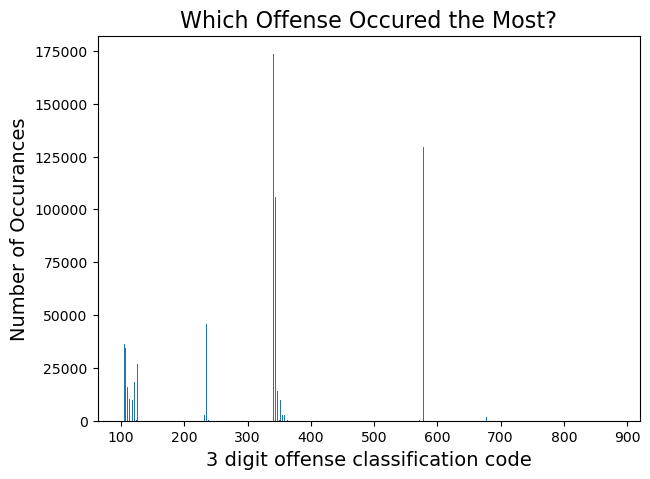

In [112]:
dig_offense_code = {}
code_meaning = {}

dig_offense_code = newdf['KY_CD'].value_counts().to_dict()
code_meaning = newdf['OFNS_DESC'].value_counts().to_dict()

plt.figure(figsize=[7,5])
plt.bar(list(dig_offense_code.keys()), list(dig_offense_code.values()))
plt.xlabel('3 digit offense classification code', size=14)
plt.ylabel('Number of Occurances', size=14)
plt.title('Which Offense Occured the Most?', size=16)

plt.show()

The most ferquent offense codes in New York are:

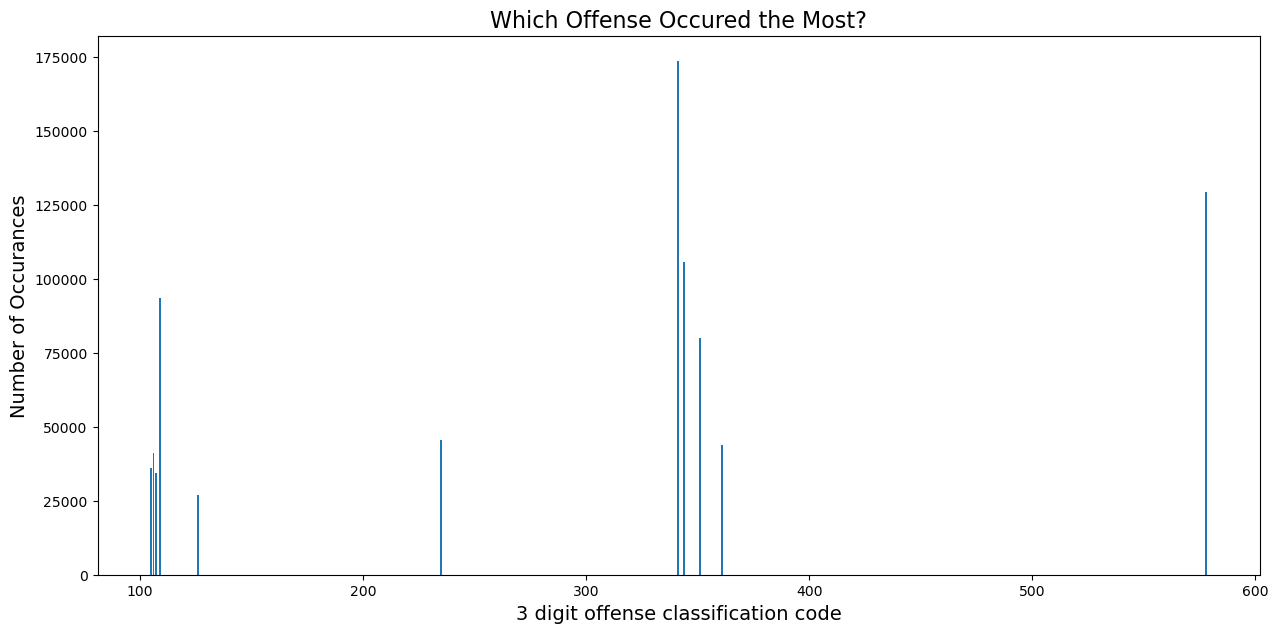

In [113]:
updated_dig_offense = {key: value for key, value in dig_offense_code.items() if value > 25000 }

        
plt.figure(figsize=[15,7])
plt.bar(list(updated_dig_offense.keys()), list(updated_dig_offense.values()))
plt.xlabel('3 digit offense classification code', size=14)
plt.ylabel('Number of Occurances', size=14)
plt.title('Which Offense Occured the Most?', size=16)

plt.show()

In [114]:
for key, meaning in zip(updated_dig_offense.keys(), code_meaning.keys()):
    print(key, ':', meaning)

341 : PETIT LARCENY
578 : HARRASSMENT 2
344 : ASSAULT 3 & RELATED OFFENSES
109 : CRIMINAL MISCHIEF & RELATED OF
351 : GRAND LARCENY
235 : DANGEROUS DRUGS
361 : OFF. AGNST PUB ORD SENSBLTY &
106 : FELONY ASSAULT
105 : ROBBERY
107 : BURGLARY
126 : MISCELLANEOUS PENAL LAW


These are the most frequent offenses in New York (as they occured over 25,000 times). Mostly Petit Larcency (341) offense is committed. It is followed by Harrasment 2 (578), Assault 3 & Related Offenses (344), and Criminal mischeif & related of (109).

## Yearly Trend of The Crimes Committed

In [115]:
yt = newdf.groupby('Year').count()
yt

,KY_CD,OFNS_DESC,LAW_CAT_CD,JURIS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,Month,Day,Hour,WeekDay
Year,,,,,,,,,,,,
1910,1,1,1,1,1,1,1,1,1,1,1,1
1913,3,3,3,3,3,3,3,3,3,3,3,3
1914,9,9,9,9,9,9,9,9,9,9,9,9
1915,7,7,7,7,7,7,7,7,7,7,7,7
1930,1,1,1,1,1,1,1,1,1,1,1,1
1941,1,1,1,1,1,1,1,1,1,1,1,1
1945,1,1,1,1,1,1,1,1,1,1,1,1
1950,1,1,1,1,1,1,1,1,1,1,1,1
1954,1,1,1,1,1,1,1,1,1,1,1,1


Most crimes took place in the recent years, 2014 and 2015 as per the data set. The highest were in 2014.

## Month with highest number of crimes

In [116]:
highcrime = newdf.groupby('Month').count()
highcrime

,KY_CD,OFNS_DESC,LAW_CAT_CD,JURIS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,Day,Year,Hour,WeekDay
Month,,,,,,,,,,,,
1,69866,69866,69866,69866,69866,69866,69866,69866,69866,69866,69866,69866
2,61677,61677,61677,61677,61677,61677,61677,61677,61677,61677,61677,61677
3,73746,73746,73746,73746,73746,73746,73746,73746,73746,73746,73746,73746
4,75013,75013,75013,75013,75013,75013,75013,75013,75013,75013,75013,75013
5,82552,82552,82552,82552,82552,82552,82552,82552,82552,82552,82552,82552
6,79964,79964,79964,79964,79964,79964,79964,79964,79964,79964,79964,79964
7,84783,84783,84783,84783,84783,84783,84783,84783,84783,84783,84783,84783
8,85232,85232,85232,85232,85232,85232,85232,85232,85232,85232,85232,85232
9,80593,80593,80593,80593,80593,80593,80593,80593,80593,80593,80593,80593


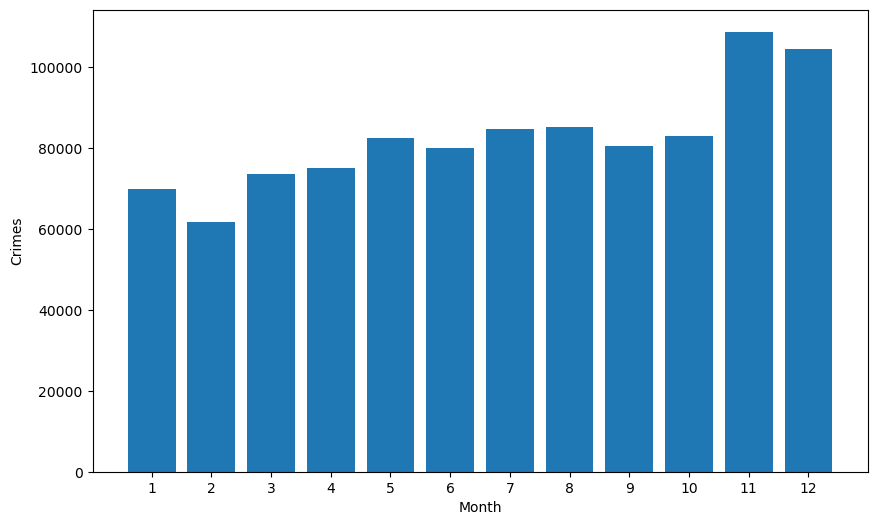

In [117]:
#visualising the monthly crimes

months = range(1,13)

plt.figure(figsize=(10, 6))
plt.bar(months, highcrime['KY_CD'])
plt.xticks(months)
plt.ylabel("Crimes")
plt.xlabel("Month")
plt.show()

Novemebr and December have the highest and second highest number of crimes, respectively. These are the most dangerous months for the people residing in New York. 

## Day of month with highest number of crimes

In [118]:
highcrime1 = newdf.groupby('Day').count()
highcrime1

,KY_CD,OFNS_DESC,LAW_CAT_CD,JURIS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,Month,Year,Hour,WeekDay
Day,,,,,,,,,,,,
1,39783,39783,39783,39783,39783,39783,39783,39783,39783,39783,39783,39783
2,31824,31824,31824,31824,31824,31824,31824,31824,31824,31824,31824,31824
3,31447,31447,31447,31447,31447,31447,31447,31447,31447,31447,31447,31447
4,32320,32320,32320,32320,32320,32320,32320,32320,32320,32320,32320,32320
5,32489,32489,32489,32489,32489,32489,32489,32489,32489,32489,32489,32489
6,32165,32165,32165,32165,32165,32165,32165,32165,32165,32165,32165,32165
7,32341,32341,32341,32341,32341,32341,32341,32341,32341,32341,32341,32341
8,32040,32040,32040,32040,32040,32040,32040,32040,32040,32040,32040,32040
9,32124,32124,32124,32124,32124,32124,32124,32124,32124,32124,32124,32124


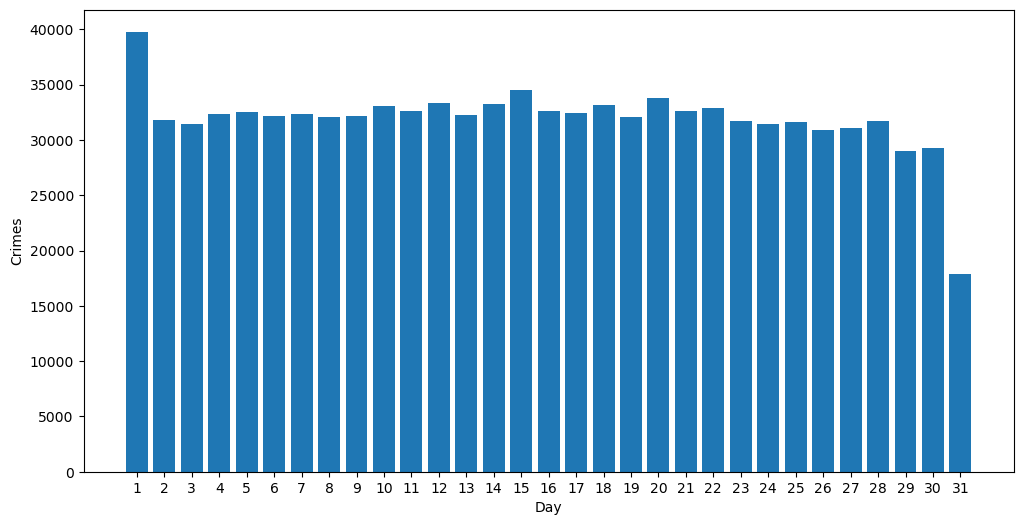

In [119]:
#visualising the daily crimes

Day = range(1,32)

plt.figure(figsize=(12, 6))
plt.bar(Day, highcrime1['KY_CD'])
plt.xticks(Day)
plt.ylabel("Crimes")
plt.xlabel("Day")
plt.show()

The 1st day of the months has a very high number of crimes, while the 31st day of the months has very low number of crime committed. The second highest number of crimes are committed in the mid of the month on 15th.

## Day of the Week with highest crime

In [128]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
highcrime3 = newdf.groupby('WeekDay').sum()
highcrime3

,KY_CD,Latitude,Longitude,Month,Day,Year,Hour
WeekDay,,,,,,,
0,40057707,5.438145e+06,-9.869508e+06,941705,2085273,268931770,1778097
1,41500690,5.702895e+06,-1.034956e+07,987981,2163426,282011425,1928318
2,42884935,5.903578e+06,-1.071387e+07,1001000,2202593,291940580,1959255
3,41856422,5.771934e+06,-1.047515e+07,971277,2196788,285433042,1913702
4,44340617,6.164116e+06,-1.118687e+07,1045121,2406262,304822354,2061676
5,43026876,5.955165e+06,-1.080753e+07,1015324,2302242,294485624,1843406
6,39822334,5.380035e+06,-9.763851e+06,926343,2031254,266056407,1607741


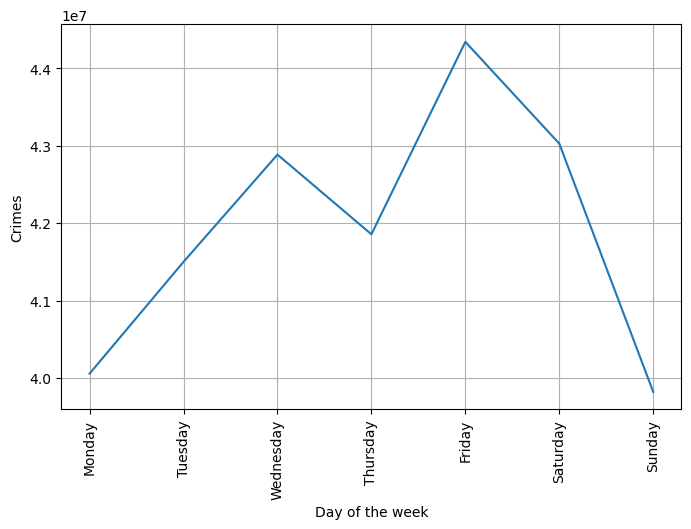

In [129]:
#visualizing day-wise sales

plt.figure(figsize=(8, 5))
plt.plot(days, highcrime3['KY_CD'])
plt.xticks(days, rotation = 'vertical')
plt.xlabel('Day of the week')
plt.ylabel('Crimes')
plt.grid()
plt.show()

Most crimes take place on Friday in New York. Saturdays and Wednesdays also see a spike in the number of crimes.

## Hours when maximum crimes take place

In [130]:
newdf['Counter'] = 1
worsthr = newdf.groupby('Hour').count()
worsthr

,KY_CD,OFNS_DESC,LAW_CAT_CD,JURIS_DESC,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,Month,Day,Year,WeekDay,Counter
Hour,,,,,,,,,,,,,
0,45591,45591,45591,45591,45591,45591,45591,45591,45591,45591,45591,45591,45591
1,33741,33741,33741,33741,33741,33741,33741,33741,33741,33741,33741,33741,33741
2,28152,28152,28152,28152,28152,28152,28152,28152,28152,28152,28152,28152,28152
3,23660,23660,23660,23660,23660,23660,23660,23660,23660,23660,23660,23660,23660
4,20479,20479,20479,20479,20479,20479,20479,20479,20479,20479,20479,20479,20479
5,14622,14622,14622,14622,14622,14622,14622,14622,14622,14622,14622,14622,14622
6,14782,14782,14782,14782,14782,14782,14782,14782,14782,14782,14782,14782,14782
7,21192,21192,21192,21192,21192,21192,21192,21192,21192,21192,21192,21192,21192
8,32699,32699,32699,32699,32699,32699,32699,32699,32699,32699,32699,32699,32699


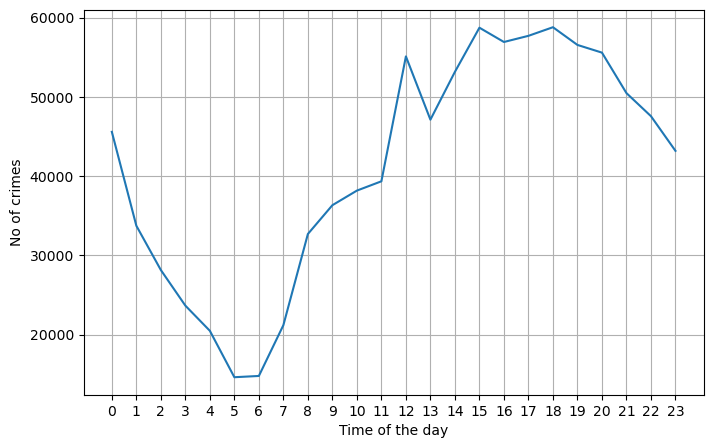

In [131]:
#visualizing hourly crimes
hours= [hour for hour, df in newdf.groupby('Hour')]

plt.figure(figsize=(8, 5))
plt.plot(hours, worsthr['Counter'])
plt.xticks(hours)
plt.xlabel('Time of the day')
plt.ylabel('No of crimes')
plt.grid()
plt.show()

Most of the crimes take place in New York from  12 noon to 11 in the evening. It is low in the morning hours until 11 AM. But, there is a sharp increase in the crimes at 3 PM and 6 PM. So the evening is quite unsafe in NY.

## Most popular level of crimes

In [132]:
newdf['Counter'] = 1
popcrimes = newdf.groupby('LAW_CAT_CD')
mostpopcrimes = popcrimes.sum()['Counter']

mostpopcrimes

LAW_CAT_CD
FELONY         311709
MISDEMEANOR    546514
VIOLATION      131512
Name: Counter, dtype: int64

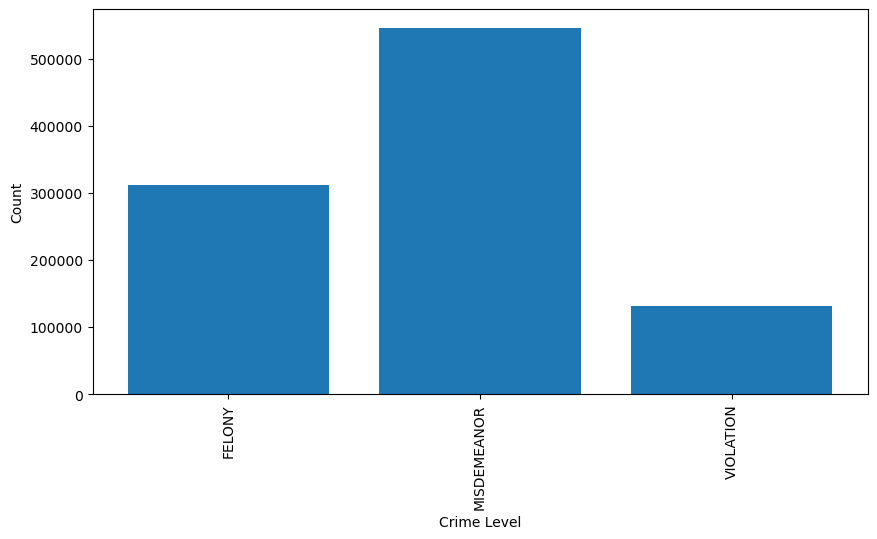

In [133]:
#visualising the most popular crime Level

crime = [crime for crime, df in popcrimes]

plt.figure(figsize=(10, 5))
plt.bar(crime, mostpopcrimes)
plt.xticks(crime, rotation = 'vertical')
plt.ylabel("Count")
plt.xlabel("Crime Level")
plt.show() 

The most popular category of crime commited in New York is Misdemeanor (a minor wrongdoing). At the second spot, we have felony (a serious crime that can be punished by more than one year in prison), and last is violation.

## Jurisdiction where maximum crimes occur

In [134]:
newdf['Counter'] = 1
popdist = newdf.groupby('JURIS_DESC')
mostpopdist = popdist.sum()['Counter']

mostpopdist

JURIS_DESC
AMTRACK                             27
CONRAIL                              1
DEPT OF CORRECTIONS               2955
HEALTH & HOSP CORP                 440
LONG ISLAND RAILRD                  49
METRO NORTH                        126
N.Y. HOUSING POLICE              75252
N.Y. POLICE DEPT                882565
N.Y. STATE PARKS                    49
N.Y. STATE POLICE                  654
N.Y. TRANSIT POLICE              21361
NEW YORK CITY SHERIFF OFFICE        46
NYC PARKS                           60
NYS DEPT TAX AND FINANCE            17
OTHER                             2617
POLICE DEPT NYC                    150
PORT AUTHORITY                    2814
STATN IS RAPID TRANS                70
TRI-BORO BRDG TUNNL                451
U.S. PARK POLICE                    31
Name: Counter, dtype: int64

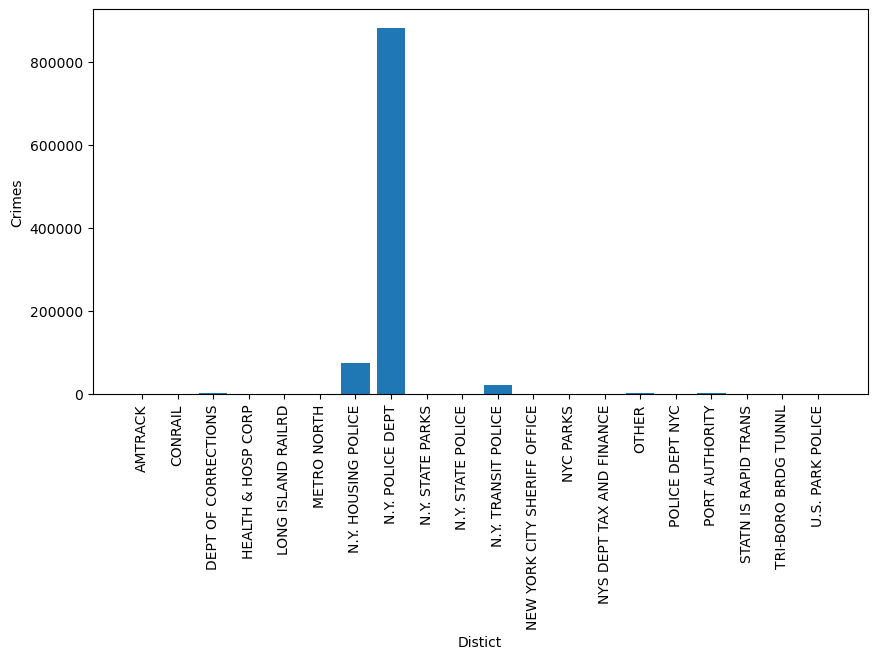

In [135]:
#visualising the most susceptible district area

crime = [crime for crime, df in popdist]

plt.figure(figsize=(10, 5))
plt.bar(crime, mostpopdist)
plt.xticks(crime, rotation = 'vertical')
plt.ylabel("Crimes")
plt.xlabel("Distict")
plt.show() 

Most of the crimes occur in N.Y. Police. Dept. The second highest crimes occur in N.Y. Housing Police and thrid highest in N.Y. Transit Police.

## Borough where maximum crimes occur

In [136]:
newdf['Counter'] = 1
popward = newdf.groupby('BORO_NM')
mostpopward = popward.sum()['Counter']

mostpopward

BORO_NM
BRONX            214096
BROOKLYN         301609
MANHATTAN        230726
QUEENS           196826
STATEN ISLAND     46478
Name: Counter, dtype: int64

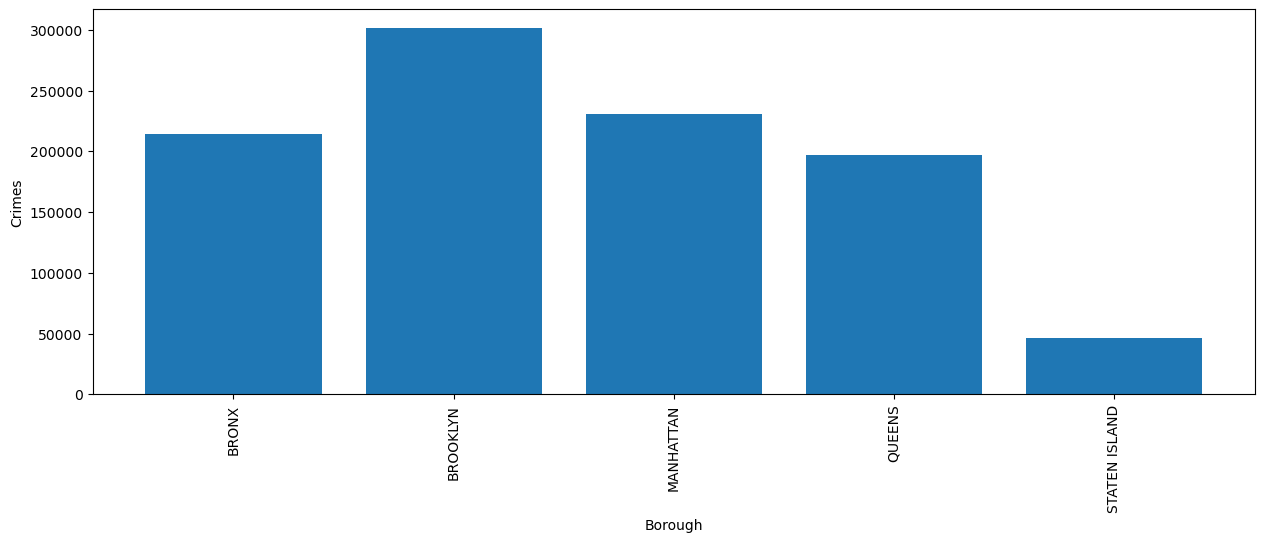

In [137]:
#visualising the most susceptible borough area

crime = [crime for crime, df in popward]

plt.figure(figsize=(15, 5))
plt.bar(crime, mostpopward)
plt.xticks(crime, rotation = 'vertical')
plt.ylabel("Crimes")
plt.xlabel("Borough")
plt.show() 

Most crimes occur in Brooklyn. The second highest crimes occur in Manhattan and third highest in Bronx. 

## Notorious location of crimes

In [138]:
newdf['Counter'] = 1
notloc = newdf.groupby('PREM_TYP_DESC')
mostnotloc = notloc.sum()['Counter']

mostnotloc

PREM_TYP_DESC
ABANDONED BUILDING            570
AIRPORT TERMINAL             1423
ATM                           913
BANK                         4155
BAR/NIGHT CLUB              11797
                            ...  
TRANSIT - NYC SUBWAY        21133
TRANSIT FACILITY (OTHER)      799
TUNNEL                        511
VARIETY STORE                1521
VIDEO STORE                   223
Name: Counter, Length: 70, dtype: int64

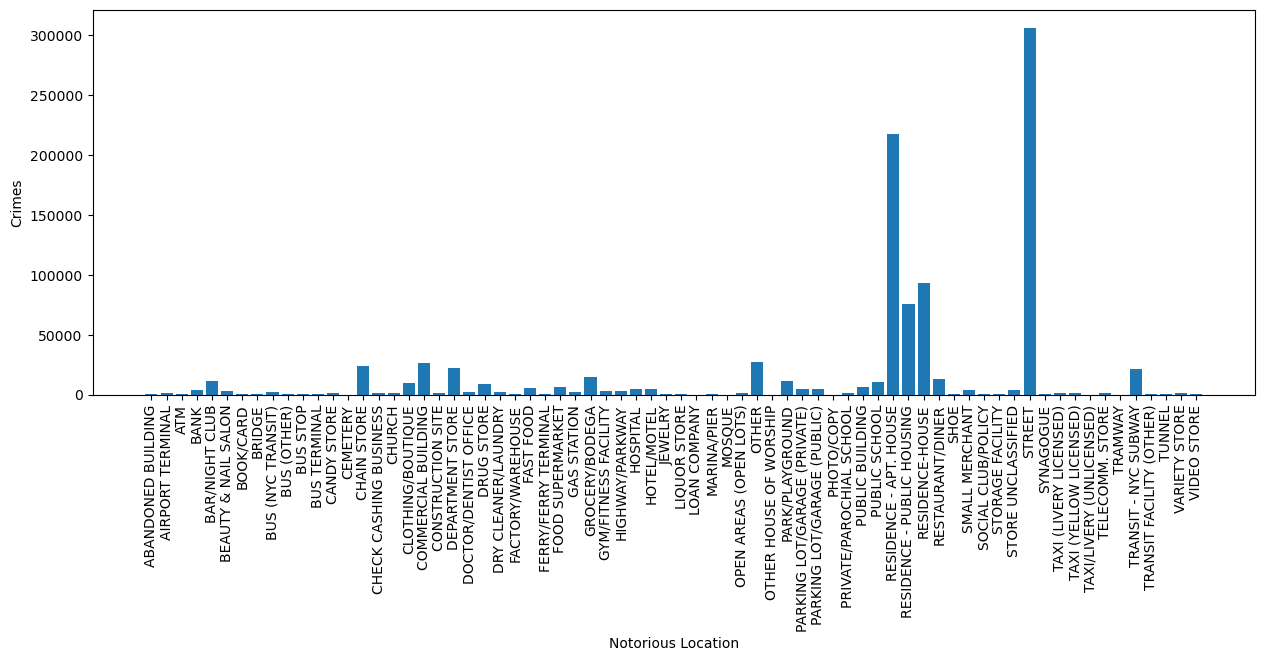

In [139]:
#visualising the most notorious location

crime = [crime for crime, df in notloc]

plt.figure(figsize=(15, 5))
plt.bar(crime, mostnotloc)
plt.xticks(crime, rotation = 'vertical')
plt.ylabel("Crimes")
plt.xlabel("Notorious Location")
plt.show() 

In New York, Street is the most notorious crime location. It is followed by Residence of people - Apartments and Houses.

# Conclusion

The city of New York has very high crime rate from 2013 onwards. Brooklyn has the most total complaints with Streets and Residences being the most unsafe places for people.

Petit Larceny, Harrassment 2, and Assault 3 are the most frequent OFNS_DESC complaint categories in the data. Novemebr and December have the most recorded complaints, and generally colder months have more records than warmer months.

Friday, Saturday, and Wednesday have the most recorded complaints, while Sunday and Monday have relatively fewer. The 1st Day of the Month has more records than any day of the first week - for all months.

As the crimes don't seem to come down any time soon, the authorities in NY should implement stronger security and safety procedures for the public. The force should also be distributed appropriately, concentrating them in areas that need less surveillance is unjustified.